In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('cardiovascular_risk_data.csv')

In [3]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Understanding Data

In [4]:
# Dataset Rows & Columns count
print(f'Number of rows in data : {df.shape[0]}')
print(f'Number of cols in data : {df.shape[1]}')

Number of rows in data : 3390
Number of cols in data : 17


In [5]:
# Information of our data like datatype, null values etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [6]:
# Check any duplicate record

df.duplicated().sum()

0

In [7]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

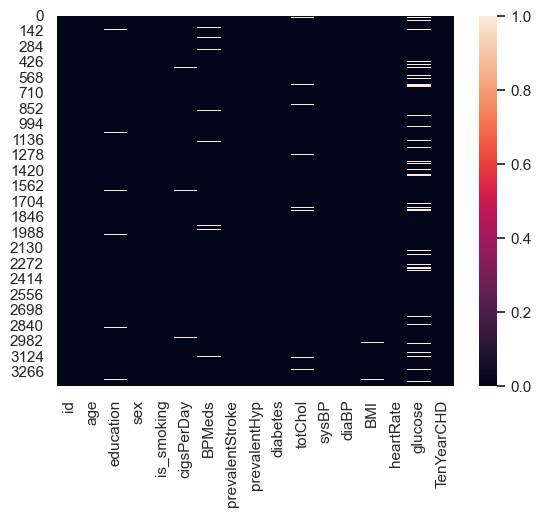

In [8]:
# Visualizing the missing values

sns.heatmap(df.isnull());

### What did you know about your dataset?

1. There are no duplicate values
2. There are null values in the following columns:
  - glucose            
  - education           
  - BPMeds              
  - totChol             
  - cigsPerDay          
  - BMI                 
  - heartRate            

# Understanding Your Variable

In [9]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
for col in df.columns.tolist():
     print(f'Unique values in {col} is : {df[col].nunique()}')

Unique values in id is : 3390
Unique values in age is : 39
Unique values in education is : 4
Unique values in sex is : 2
Unique values in is_smoking is : 2
Unique values in cigsPerDay is : 32
Unique values in BPMeds is : 2
Unique values in prevalentStroke is : 2
Unique values in prevalentHyp is : 2
Unique values in diabetes is : 2
Unique values in totChol is : 240
Unique values in sysBP is : 226
Unique values in diaBP is : 142
Unique values in BMI is : 1259
Unique values in heartRate is : 68
Unique values in glucose is : 132
Unique values in TenYearCHD is : 2


# Data Wrangling

In [12]:
#Renaming the columns
df.rename(columns={'prevalentStroke':'Had_stroke','prevalentHyp':'Had_hypertension','totChol':'Total_cholestrol',
                   'sysBP':'Systolic_BP','diaBP':'Diastolic_BP'},inplace=True)

In [13]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'Had_stroke', 'Had_hypertension', 'diabetes', 'Total_cholestrol',
       'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [14]:
#Creating lists of continuous, categorical and target variable from data
categorical_var = ['education','sex','is_smoking','BPMeds','Had_stroke','Had_hypertension','diabetes']
continuos_var = ['id','age','cigsPerDay','Total_cholestrol','Systolic_BP','Diastolic_BP','BMI','heartRate','glucose']
target_var = ['TenYearCHD']

### Data Cleaning

We have to deal with the null values, for this we have taken the following approach:

  - Categorical Columns : Replace Null values with mode
  - Continuous Columns : Replace Null values with median/KNN Imputer

In [15]:
# Get column names with null values
cat_null_cols = []
con_null_cols = []

for i in df.columns[df.isnull().any()].tolist():
    if i in categorical_var:
        cat_null_cols.append(i)
    elif i in continuos_var:
        con_null_cols.append(i)

In [16]:
print('List of Null values for Categorical Columns ',cat_null_cols)
print('List of Null values for Continuous Columns',con_null_cols)

List of Null values for Categorical Columns  ['education', 'BPMeds']
List of Null values for Continuous Columns ['cigsPerDay', 'Total_cholestrol', 'BMI', 'heartRate', 'glucose']


In [17]:
# Replacing all null values in Categorical Columns with mode
for i in cat_null_cols:
    df[i] = df[i].fillna(df[i].mode()[0])
    
df.isnull().sum().sort_values(ascending=False)

glucose             304
Total_cholestrol     38
cigsPerDay           22
BMI                  14
heartRate             1
id                    0
diabetes              0
Diastolic_BP          0
Systolic_BP           0
Had_hypertension      0
age                   0
Had_stroke            0
BPMeds                0
is_smoking            0
sex                   0
education             0
TenYearCHD            0
dtype: int64

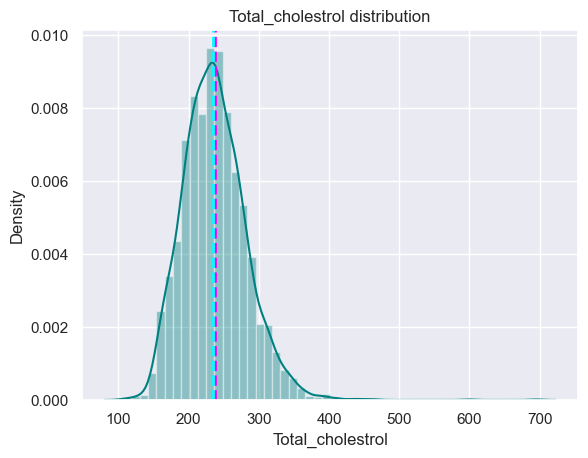

0.9406357047700903


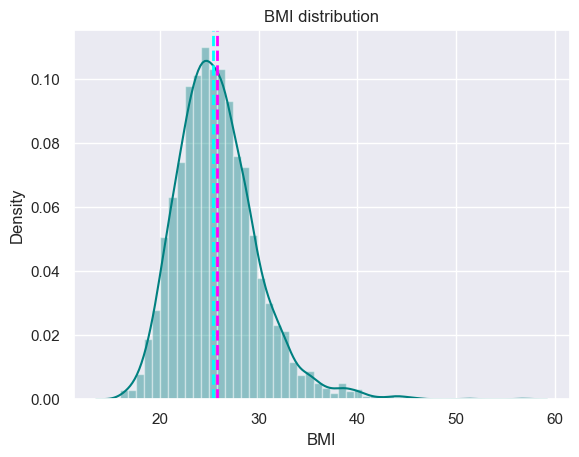

1.0222520011438563


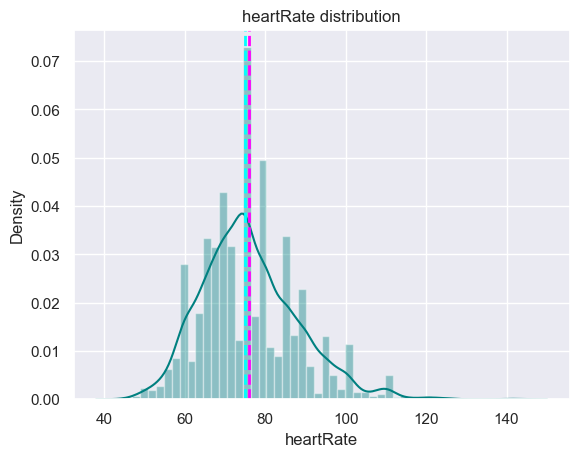

0.6764897223370003


In [18]:
#For continuos variable null values, plotting distribution

for i,col in enumerate(con_null_cols[1:-1]):
    sns.distplot(df[col],color='teal')
    plt.axvline(df[col].mean(),color='magenta',linestyle='dashed',linewidth=2)
    plt.axvline(df[col].median(),color='cyan',linestyle='dashed',linewidth=2)
    plt.title(col+' distribution')
    plt.show()
    print(df[col].skew())

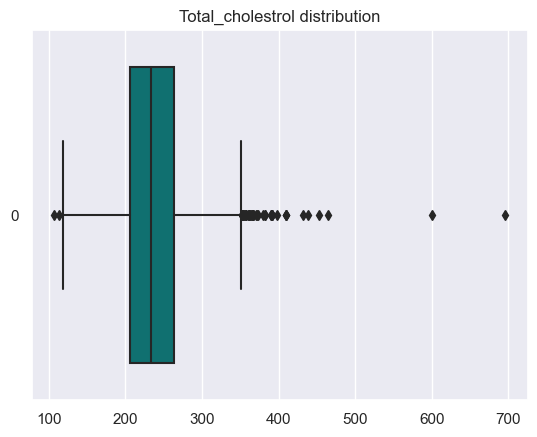

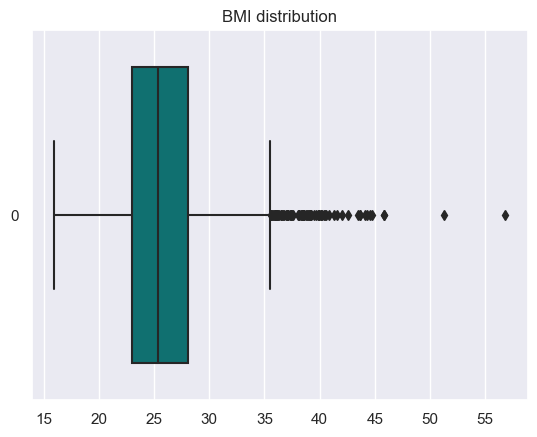

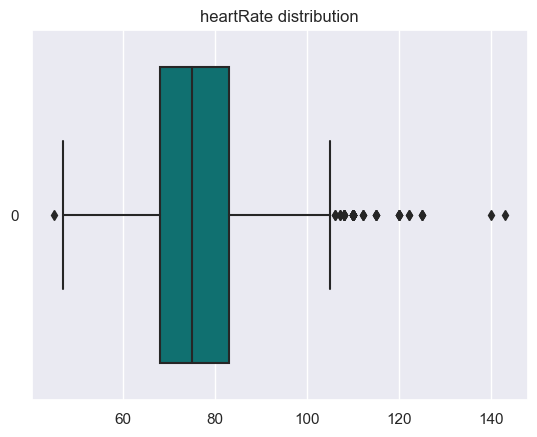

In [19]:
# For Continuos Variable null values, plotting boxplot

for i,col in enumerate(con_null_cols[1:-1]):
    sns.boxplot(df[col],orient='h',color='teal')
    plt.title(col+' distribution')
    plt.show()

From above charts we can see that:
1. Total_cholestrol, BMI and heartRate columns are positively skewed
2. Total_cholestrol, BMI and heartRate columns have outliers

Hence, for these columns, imputing the null values with median values.

In [20]:
# Imputting Null Values with median values for the above columns

for i in con_null_cols[1:-1]:
    df[i] = df[i].fillna(df[i].median())
    
df.isnull().sum().sort_values(ascending=False)

glucose             304
cigsPerDay           22
id                    0
diabetes              0
heartRate             0
BMI                   0
Diastolic_BP          0
Systolic_BP           0
Total_cholestrol      0
Had_hypertension      0
age                   0
Had_stroke            0
BPMeds                0
is_smoking            0
sex                   0
education             0
TenYearCHD            0
dtype: int64

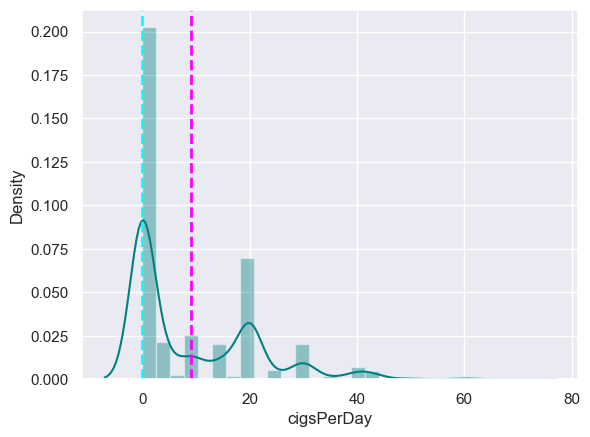

In [21]:
# For cigPerDay

sns.distplot(df['cigsPerDay'],color='teal')
plt.axvline(df['cigsPerDay'].mean(),color='magenta',linestyle='dashed',linewidth=2)
plt.axvline(df['cigsPerDay'].median(),color='cyan',linestyle='dashed',linewidth=2)
plt.show()

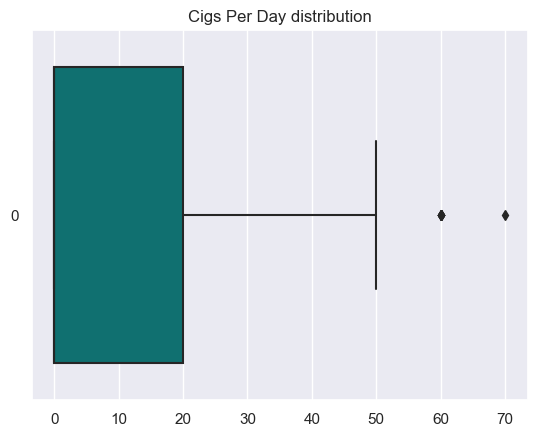

In [22]:
sns.boxplot(df['cigsPerDay'],orient='h',color='teal')
plt.title('Cigs Per Day distribution')
plt.show()

cigPerDay column is also positively skewed and has some outliers, hence replacing the null values with median values for people who smoke

In [23]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[(df['is_smoking']=='YES')]['cigsPerDay'].median())

In [24]:
df.isnull().sum()

id                    0
age                   0
education             0
sex                   0
is_smoking            0
cigsPerDay            0
BPMeds                0
Had_stroke            0
Had_hypertension      0
diabetes              0
Total_cholestrol      0
Systolic_BP           0
Diastolic_BP          0
BMI                   0
heartRate             0
glucose             304
TenYearCHD            0
dtype: int64

In [25]:
# Checking For possible wrong values

# Number of cigs per day > 0 but the person is non-smoker

df[(df['cigsPerDay']>0) & (df['is_smoking']=='NO')]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,Had_stroke,Had_hypertension,diabetes,Total_cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD


In [26]:
# Checking For possible wrong values

# Number of cigs per day = 0 but the person is smoker

df[(df['cigsPerDay']==0) & (df['is_smoking']=='YES')]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,Had_stroke,Had_hypertension,diabetes,Total_cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD


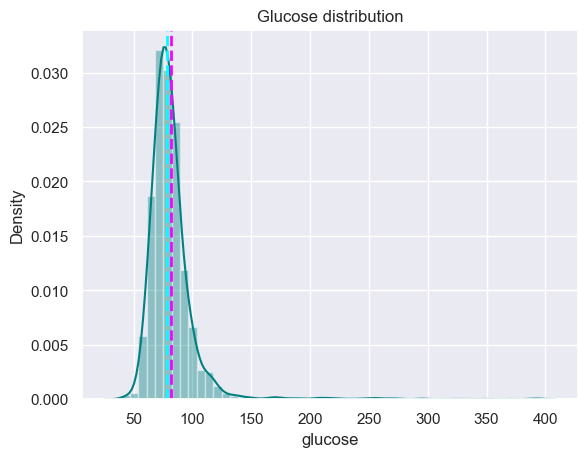

In [27]:
# For Glucose Column

sns.distplot(df['glucose'],color='teal')
plt.axvline(df['glucose'].mean(),color='magenta',linestyle='dashed',linewidth=2)
plt.axvline(df['glucose'].median(),color='cyan',linestyle='dashed',linewidth=2)
plt.title('Glucose distribution')
plt.show()

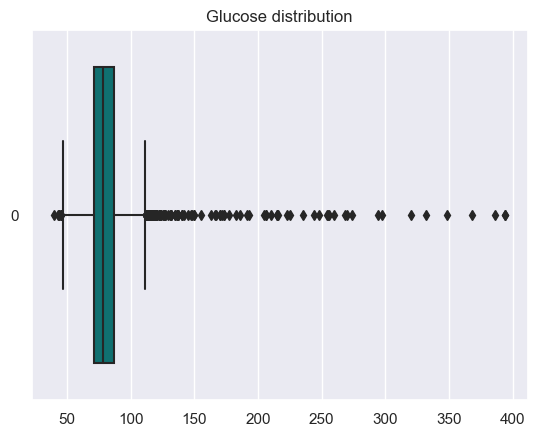

In [28]:
sns.boxplot(df['glucose'],orient='h',color='teal')
plt.title('Glucose distribution')
plt.show()

Glucose is also positively skewed and has lot of outlier values.

As the number of null values in glucose is high, so replacing null values with just one single median value is not benefitial and can create bias. We can instead use KNN Imputer for filling null values.

In [29]:
# Label Encoding Categorical columns sex and is_smoking 
df['sex'] = df['sex'].apply(lambda x:1 if x=='M' else 0)
df['is_smoking'] = df['is_smoking'].apply(lambda x:1 if x=='YES' else 0)


In [30]:
from sklearn.impute import KNNImputer

In [31]:
# Using KNN imputer with k=10

imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed,columns=df.columns)

In [32]:
df.isnull().sum()

id                  0
age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
Had_stroke          0
Had_hypertension    0
diabetes            0
Total_cholestrol    0
Systolic_BP         0
Diastolic_BP        0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

### What all manipulations have you done and insights you found?

- For Categorical variable: Replace null value with mode values

- For Continuous variabl:
    - Total_cholestrol, BMI, hearRate: Replace null values with median values
    - cigsPerDay: Replace null values with median value of people who smoke
    - glucose: TO avoid bais due to high number of null values, Replace null values with KNN imputer

# Exploratory Data Analysis

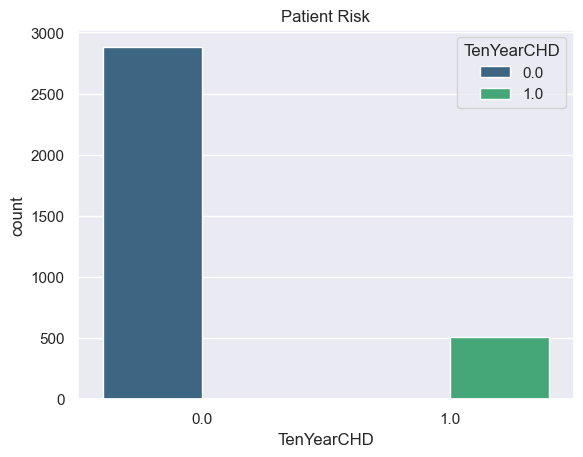

In [33]:
# Checking Patient Riek (Target Variable) Distribution
sns.countplot(data=df,x='TenYearCHD',hue='TenYearCHD',palette='viridis')
plt.title('Patient Risk')
plt.show()

## What is/are the insight(s) found from the chart?

This chart shows the distribution of target variable: TenYearCHD From the above chart we can see that there is a class imbalance which needs to be deal with before building the models.

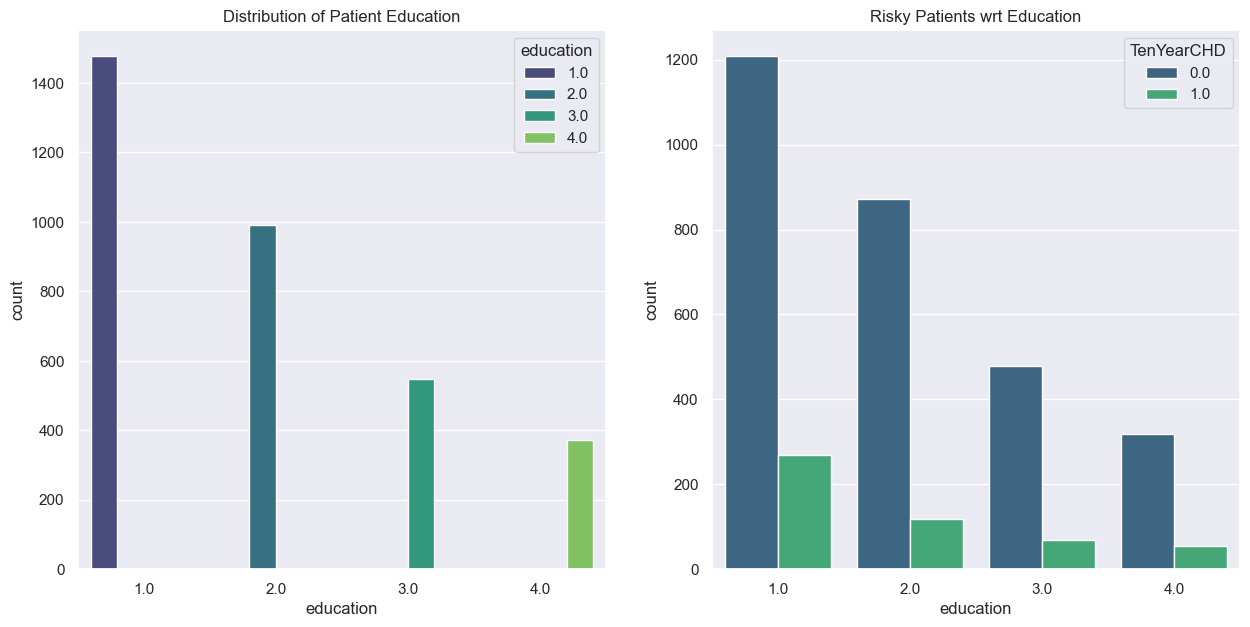

In [34]:
# Distribution of education 

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df,x='education',hue='education',palette='viridis')
plt.title('Distribution of Patient Education')

plt.subplot(1,2,2)
sns.countplot(data=df,x='education',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Education')
plt.show()

## What is/are the insight(s) found from the chart?
- Most patients have level 1 education
- Mostly level 1 patients are prone to coronary heart diseases(CHD)

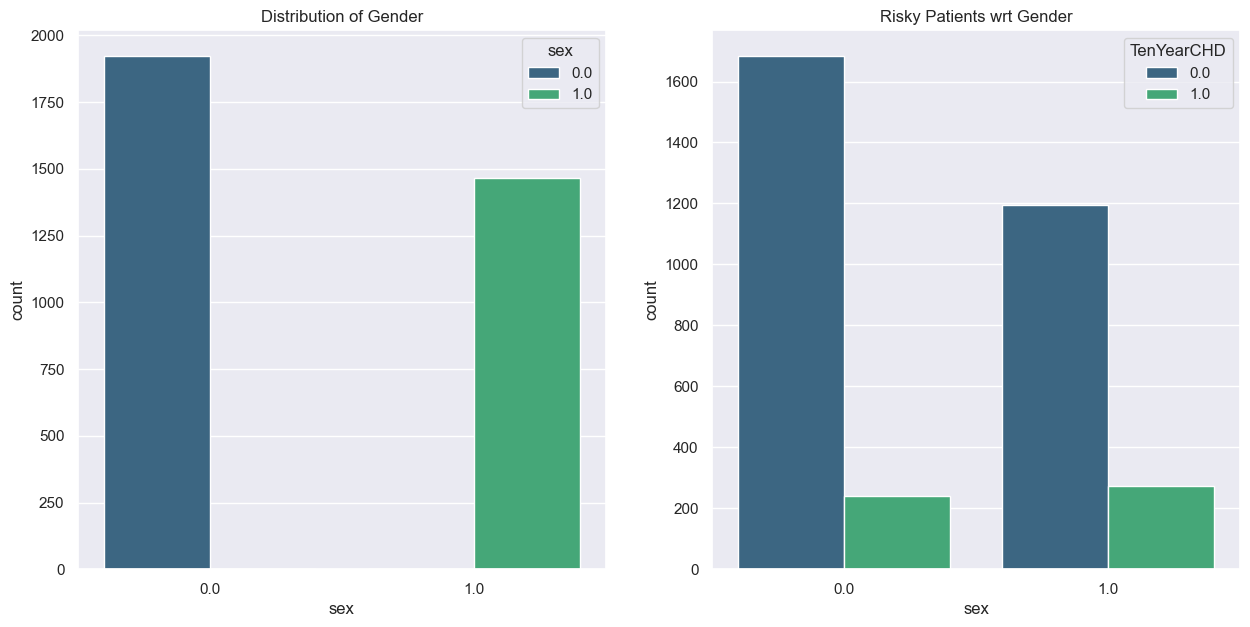

In [35]:
# Distribution of sex


plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df,x='sex',hue='sex',palette='viridis')
plt.title('Distribution of Gender')

plt.subplot(1,2,2)
sns.countplot(data=df,x='sex',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Gender')
plt.show()

## What is/are the insight(s) found from the chart?

Label Encoding: Female = 0, Male = 1
- There are more female patients in the dataset
- The number of risky patients who are male slightly higher than risky female patients

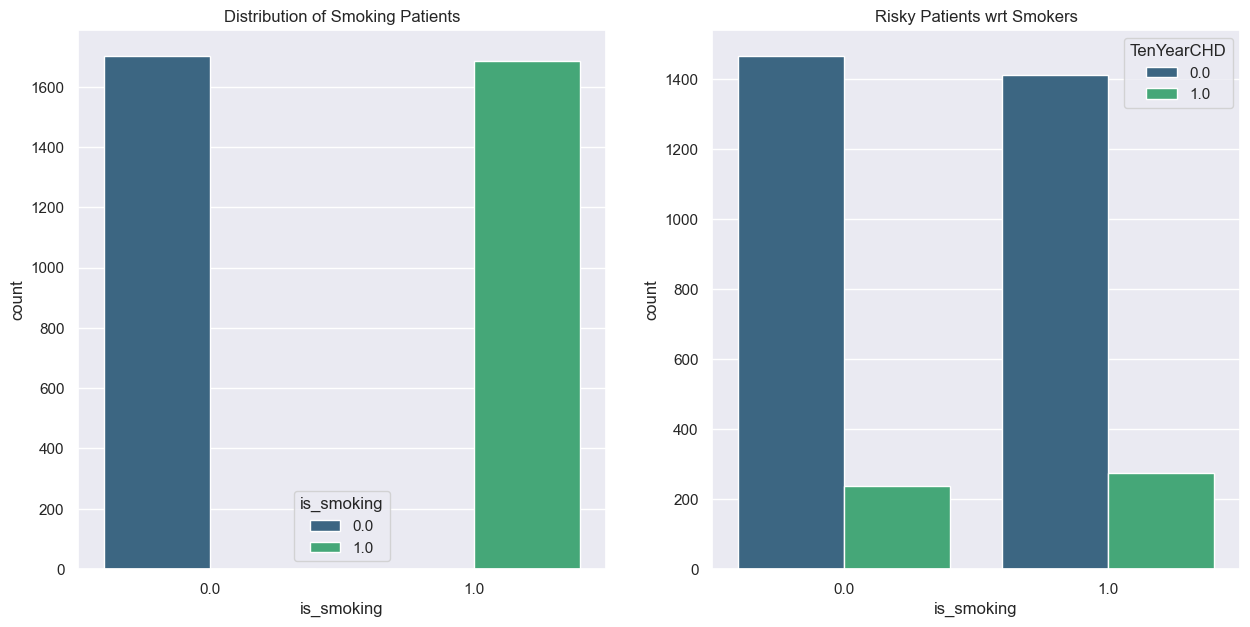

In [36]:
# Distribution of smokers

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df,x='is_smoking',hue='is_smoking',palette='viridis')
plt.title('Distribution of Smoking Patients')

plt.subplot(1,2,2)
sns.countplot(data=df,x='is_smoking',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Smokers')
plt.show()

## What is/are the insight(s) found from the chart?

- Number of smoker and non-smoker are almost equal in number.
- However, number of smokers at risk are slightly more than non-smokers at risk of CHD.


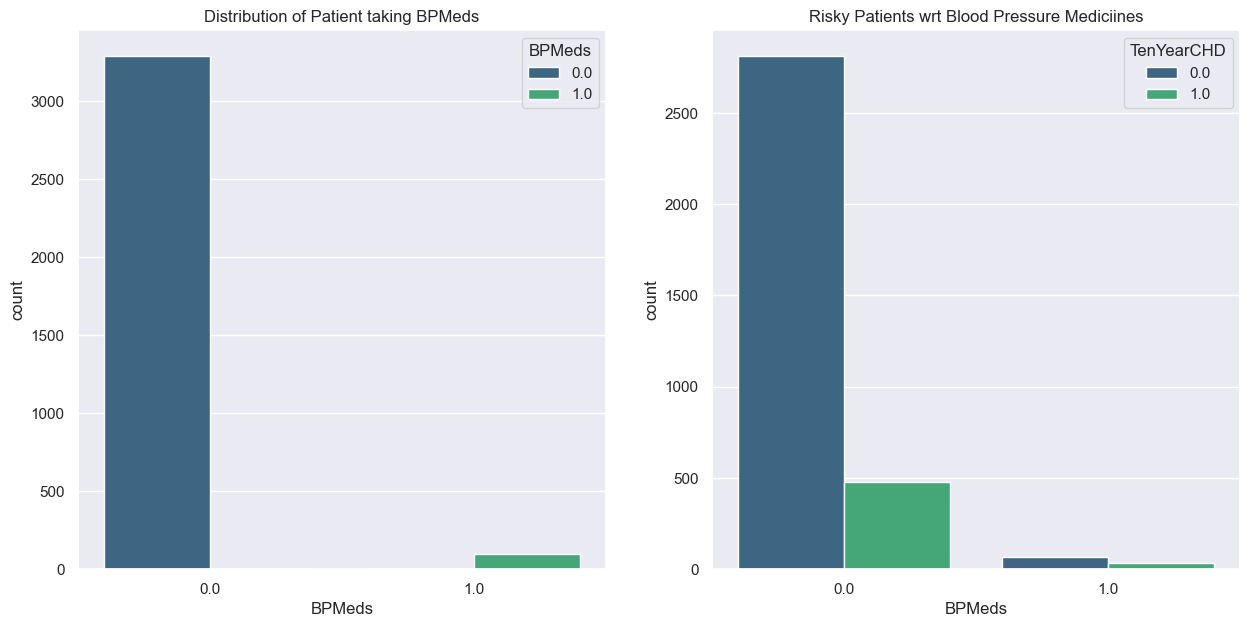

In [37]:
# Distribution of BPMeds


plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df,x='BPMeds',hue='BPMeds',palette='viridis')
plt.title('Distribution of Patient taking BPMeds')

plt.subplot(1,2,2)
sns.countplot(data=df,x='BPMeds',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Blood Pressure Mediciines')
plt.show()

## What is/are the insight(s) found from the chart?

- Very few people are on blood pressire medications, and the number of risky patients taking BP meds are negligible.

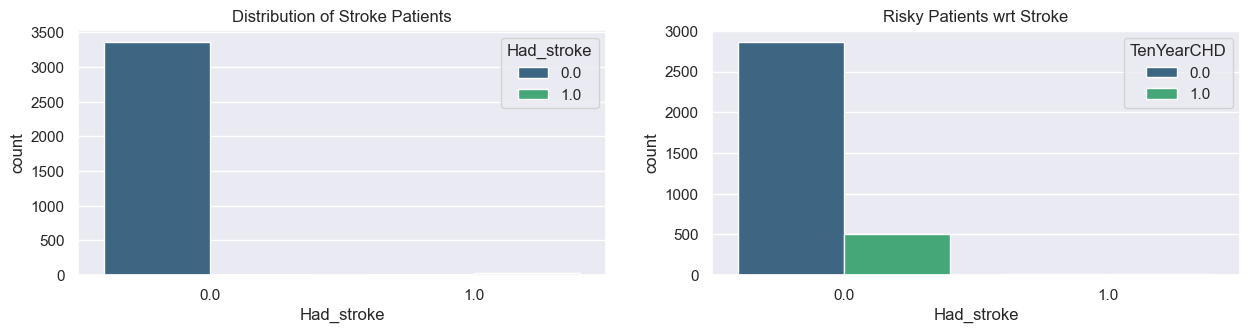

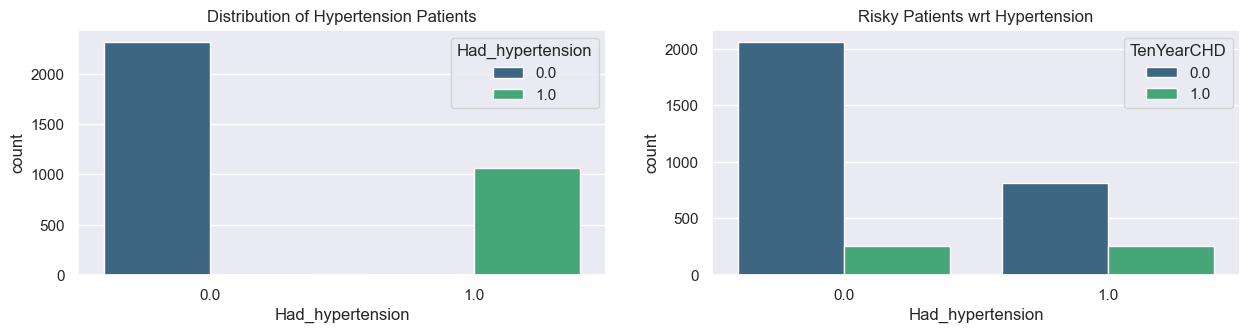

In [38]:
# Distribution of Patients Who had Stroke and Hypertension


plt.figure(figsize=(15,7))

plt.subplot(2,2,1)
sns.countplot(data=df,x='Had_stroke',hue='Had_stroke',palette='viridis')
plt.title('Distribution of Stroke Patients')

plt.subplot(2,2,2)
sns.countplot(data=df,x='Had_stroke',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Stroke')
plt.show()


plt.figure(figsize=(15,7))

plt.subplot(2,2,3)
sns.countplot(data=df,x='Had_hypertension',hue='Had_hypertension',palette='viridis')
plt.title('Distribution of Hypertension Patients')

plt.subplot(2,2,4)
sns.countplot(data=df,x='Had_hypertension',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Hypertension')
plt.show()

## What is/are the insight(s) found from the chart?

- Most people have not had a stroke.
- Although fewer people have had hypertension, the number of patients with hypertension is the same for both risky and non-risky groups.

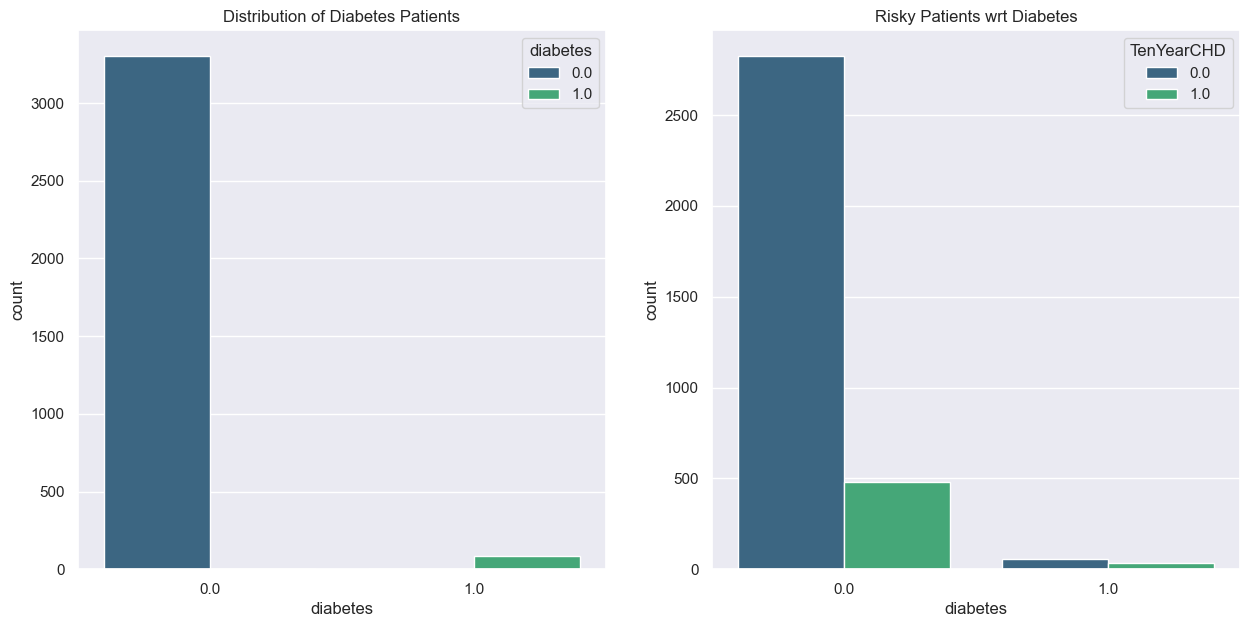

In [39]:
# Distribution of Diabetes


plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df,x='diabetes',hue='diabetes',palette='viridis')
plt.title('Distribution of Diabetes Patients')

plt.subplot(1,2,2)
sns.countplot(data=df,x='diabetes',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Diabetes')
plt.show()

## What is/are the insight(s) found from the chart?

- Most patients do not have diabetes.
- Most Risky patients don't have diabetes

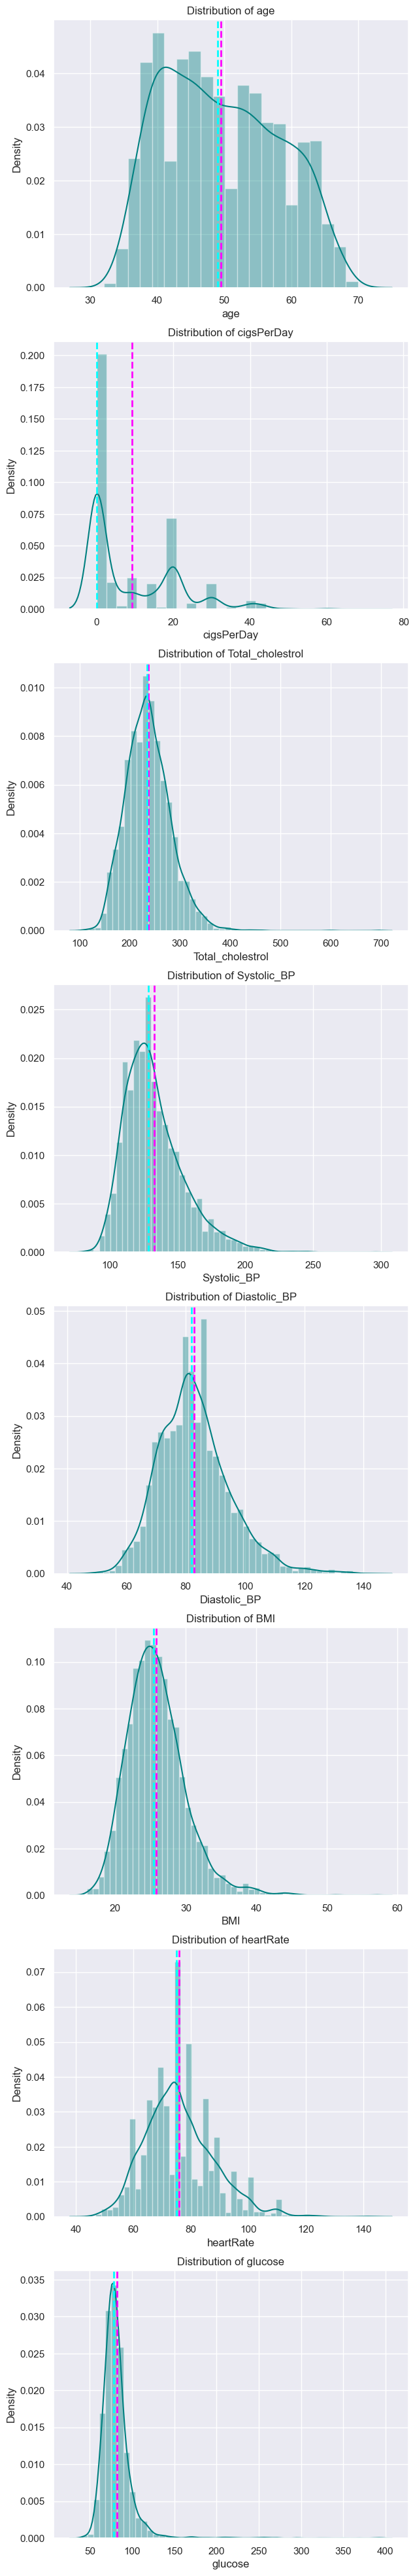

In [40]:
# Distribution of Continuos Variable 

plt.figure(figsize=(7,50))

for i,col in enumerate(continuos_var[1:]):
    plt.subplot(8,1,i+1)
    sns.distplot(df[col],color='teal')
    plt.axvline(df[col].mean(),color='magenta',linestyle='dashed',linewidth=2)
    plt.axvline(df[col].median(),color='cyan',linestyle='dashed',linewidth=2)
    plt.title('Distribution of '+ col)
plt.show()

## What is/are the insight(s) found from the chart?

- Most of the continous variable columns are positively skewed. We will deal with skewness in data transformation.

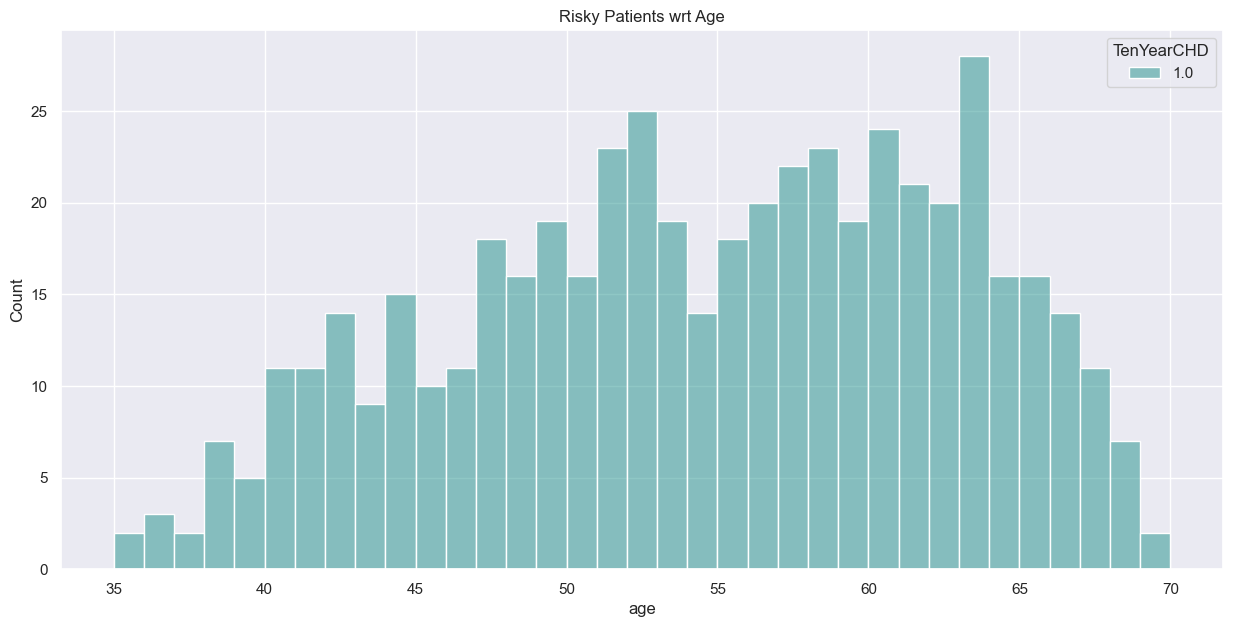

In [41]:
# Risky Patients wrt Age

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='age',hue='TenYearCHD',bins=35,palette='viridis')
plt.title('Risky Patients wrt Age')
plt.show()

## What is/are insight(s) found from the chart?

- Most number of riskt patient are between the age 51 to 63

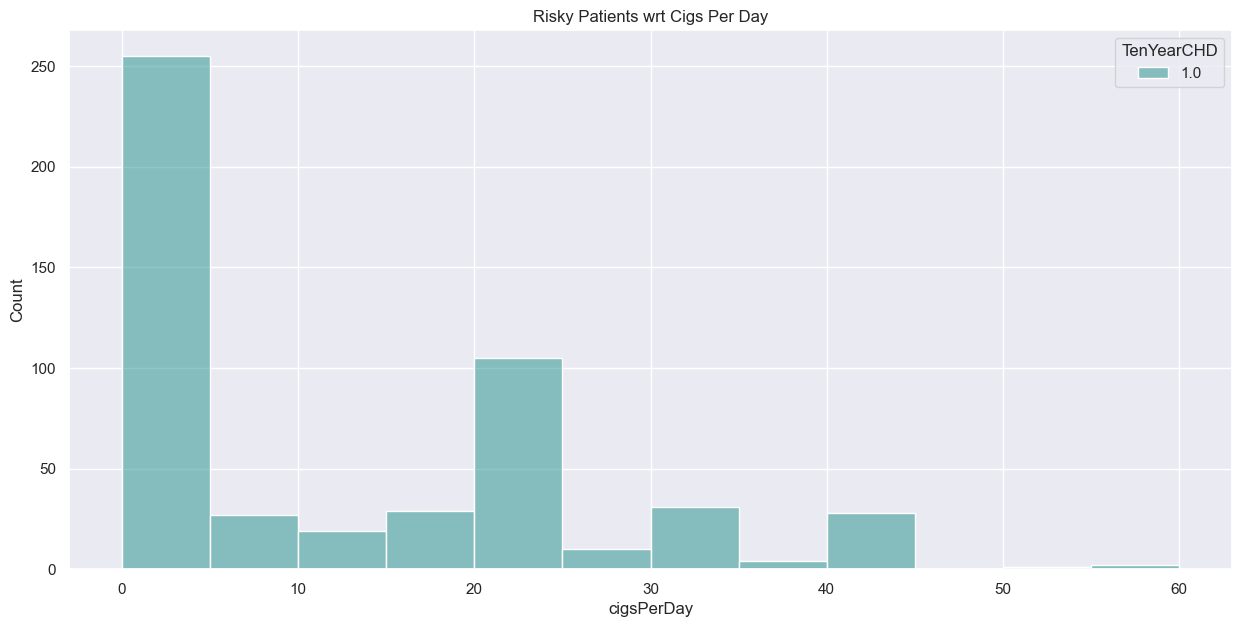

In [42]:
# Risky Patients wrt Cigs Per Day

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='cigsPerDay',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Cigs Per Day')
plt.show()

## What is/are insight(s) found from the chart?
- Most of the patients have less than 5 cigarette per day.

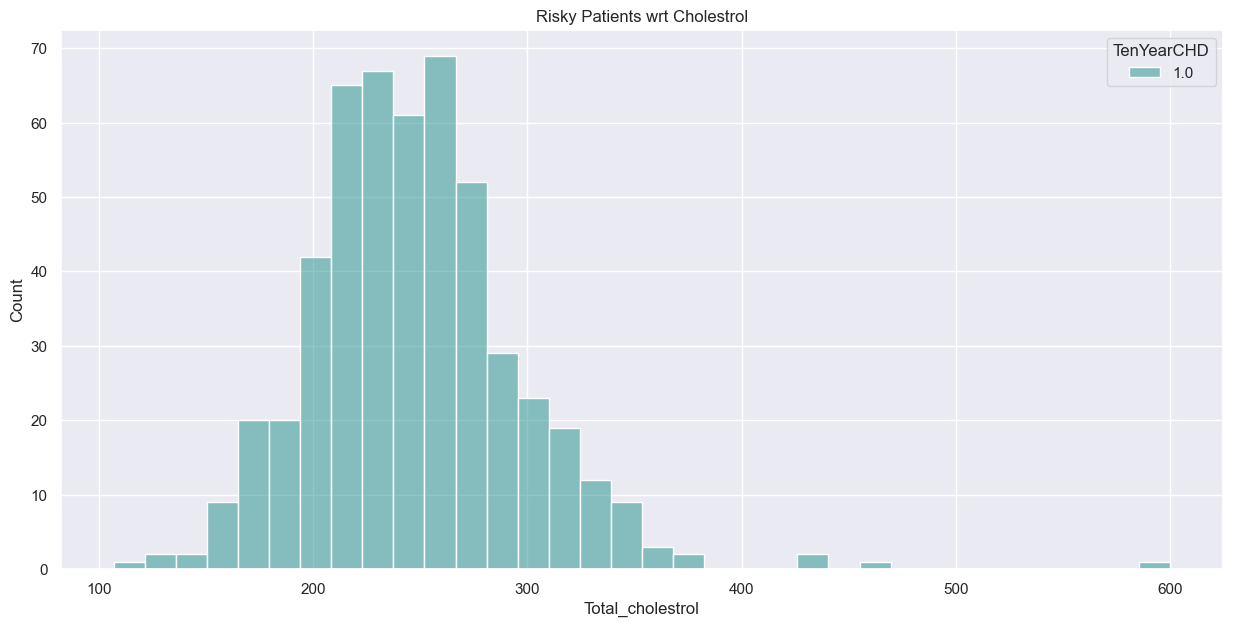

In [43]:
# Risky Patients wrt Cholestrol

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='Total_cholestrol',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Cholestrol')
plt.show()

## What is/are the insight(s) found from the chart?

- Most risky patients have cholesterol level between 200 and 300.

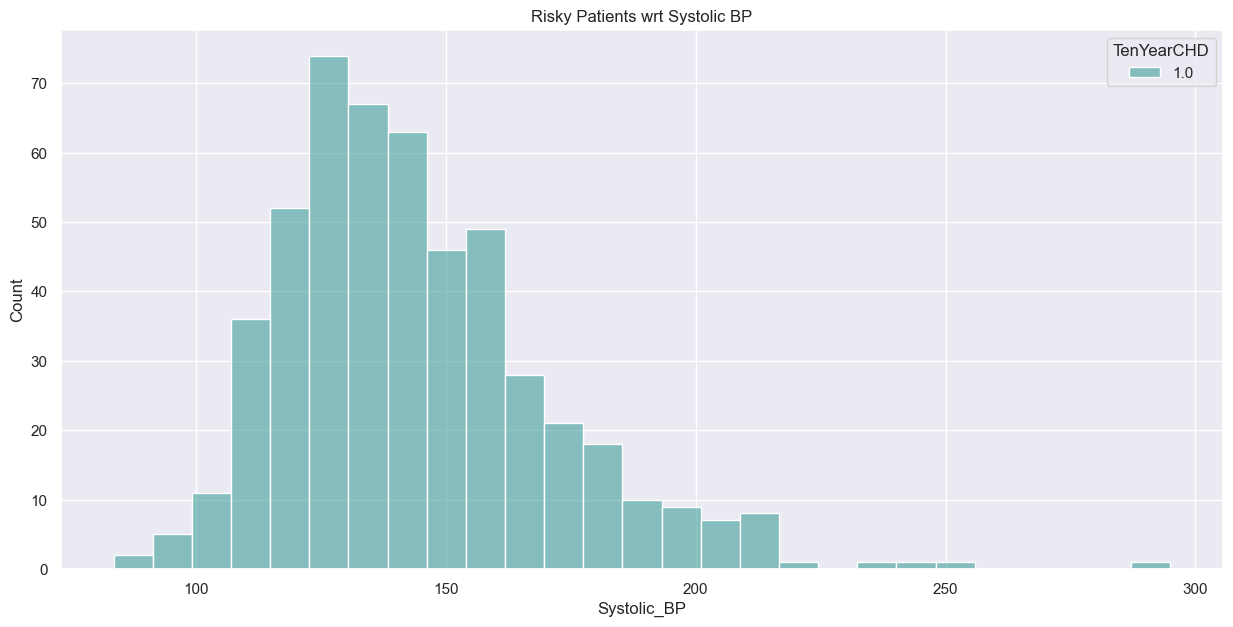

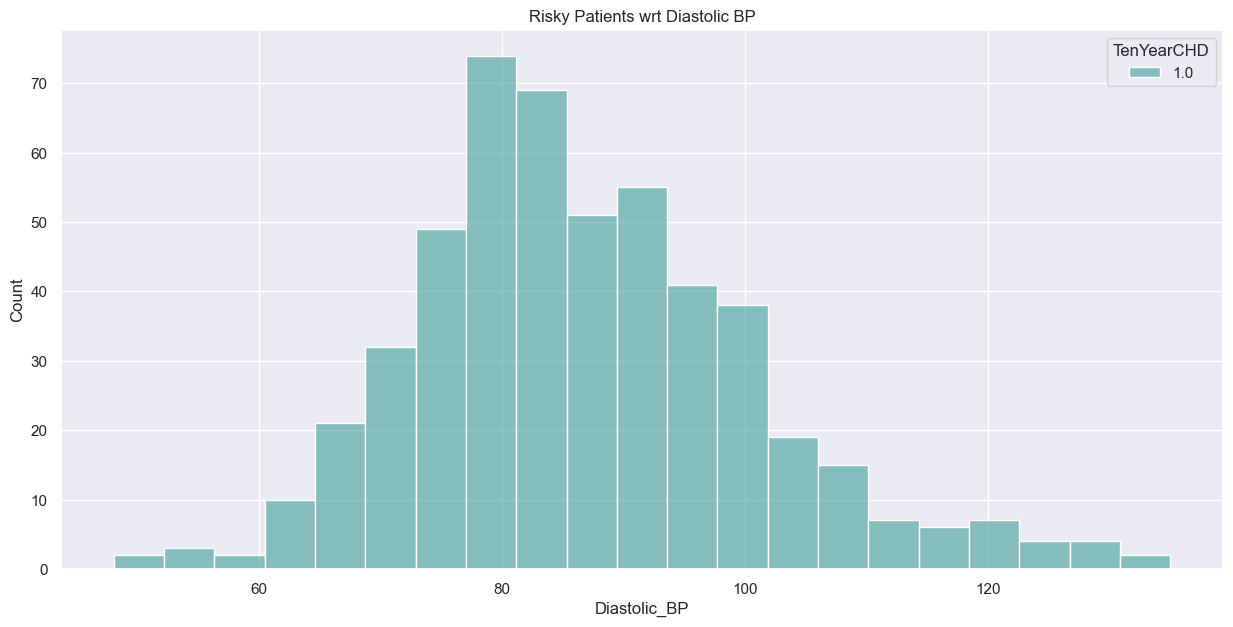

In [44]:
# Risky Patients wrt Different Types of BP

# Risky Patients wrt Systolic Blood Pressure

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='Systolic_BP',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Systolic BP')
plt.show()

# Risky Patients wrt Diastolic Blood Pressure

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='Diastolic_BP',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Diastolic BP')
plt.show()

## What is/are insight(s) found from the chart?

Mostly for Risky Patients:
   - Systolic BP is between 120 and 150
   - Diastolic BP is between 75 and 90

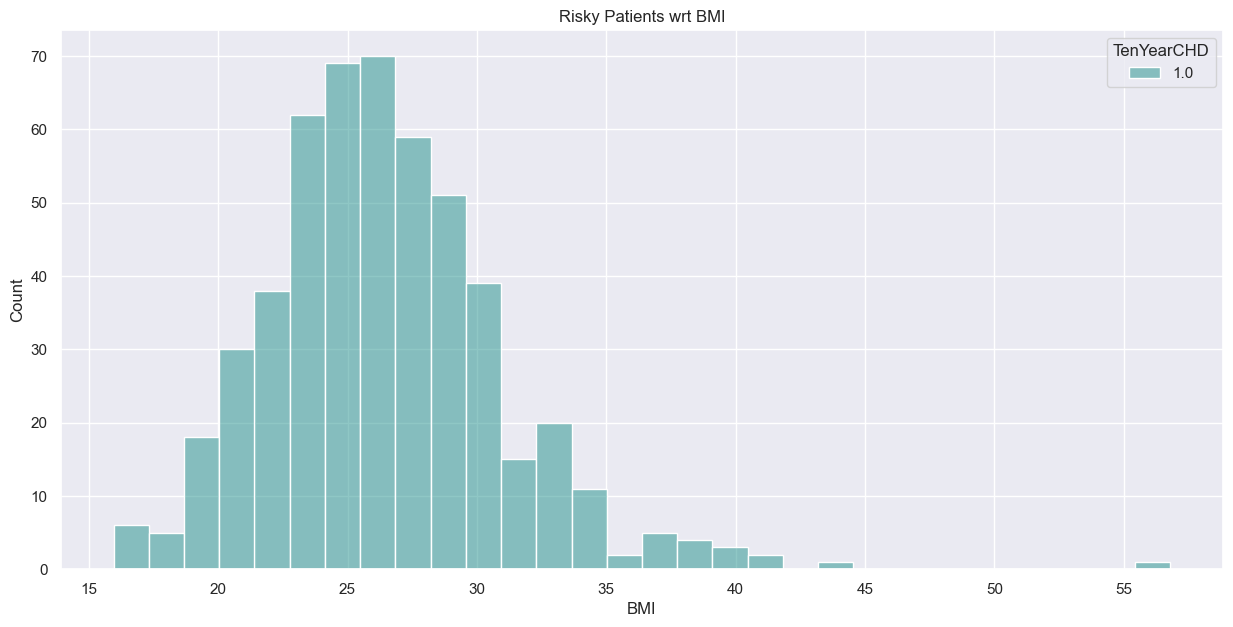

In [45]:
# Risky Patients wrt BMI

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='BMI',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt BMI')
plt.show()

## What is/are the insight(s) found from the chart?

Mostly risky patients have BMI between 24-27

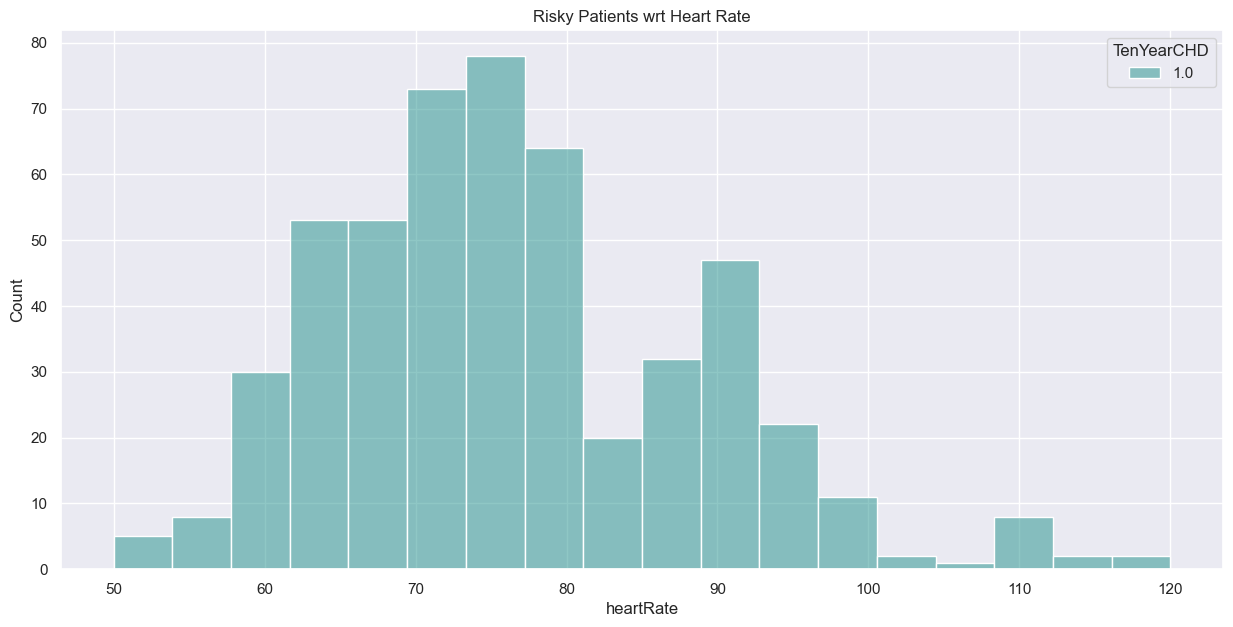

In [46]:
# Risky Patients wrt Heart Rate

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='heartRate',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt Heart Rate')
plt.show()

## What is/are the insight(s) found from the chart?

Mostly risky patients have heart rate between 79-80

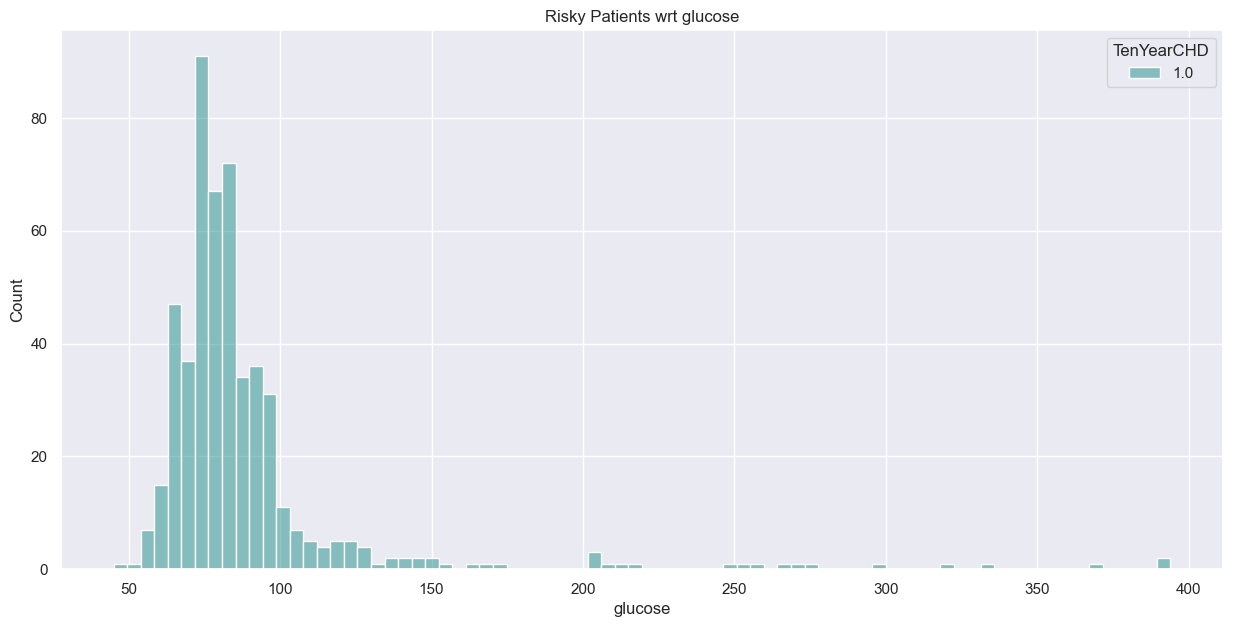

In [47]:
# Risky Patients wrt Glucose

plt.figure(figsize=(15,7))
sns.histplot(data=df[df['TenYearCHD']==1],x='glucose',hue='TenYearCHD',palette='viridis')
plt.title('Risky Patients wrt glucose')
plt.show()

## What is/are insight(s) found from the chart?

Mostly risky patients have glucose between 50-100

## ***Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Glucose is positively skewed
2. The most important discrete feature is diabetes
3. The most important continuous feature is age


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Glucose is postively skewed

Alternative Hypothesis : Glucose is not positively skewed

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test
df['glucose'].skew(axis=0)

6.342892228471824

We can see that glucose is indeed postively skewed, hence we cannot reject null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : Diabetes is the most important discrete feature , P-value = min

Alternative Hypothesis : Diabetes is not the most important discrete feature, P-value != min

In [49]:
# chi2 scores
from sklearn.feature_selection import chi2
chi_scores = chi2(df[categorical_var],df[target_var])
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

#### 2. Perform an appropriate statistical test.

In [50]:
# Perform Statistical Test to obtain P-Value
# P values for discrete features
p_values_dis = pd.Series(chi_scores[1],index = df[categorical_var].columns)
p_values_dis.sort_values(ascending = False , inplace = True)
p_values_dis

is_smoking          1.588409e-01
education           2.909740e-02
sex                 2.056887e-04
Had_stroke          6.813318e-05
BPMeds              5.436407e-07
diabetes            2.542262e-09
Had_hypertension    1.027137e-15
dtype: float64

Minimum p-value for discrete features is of Had_hypertension and not diabetes, hence we can reject null hypothesis

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : P-value (age) =  min

Alternative Hypothesis : P-value (age) != min

#### 2. Perform an appropriate statistical test.

In [51]:
chi_scores = chi2(df[continuos_var],df[target_var])
chi_scores

(array([186.48608722, 255.53868716, 219.09634718, 253.6051997 ,
        574.60619624, 109.29870375,   9.69338074,   2.59938835,
        406.61734779]),
 array([1.85942695e-042, 1.61067400e-057, 1.42395124e-049, 4.25104457e-057,
        5.58923295e-127, 1.39583526e-025, 1.84932976e-003, 1.06904966e-001,
        1.99733235e-090]))

In [52]:
# Perform Statistical Test to obtain P-Value
# P values for continuous features
p_values_con = pd.Series(chi_scores[1],index = df[continuos_var].columns)
p_values_con.sort_values(ascending = False , inplace = True)
p_values_con

heartRate            1.069050e-01
BMI                  1.849330e-03
Diastolic_BP         1.395835e-25
id                   1.859427e-42
cigsPerDay           1.423951e-49
Total_cholestrol     4.251045e-57
age                  1.610674e-57
glucose              1.997332e-90
Systolic_BP         5.589233e-127
dtype: float64

Systolic BP has the least P-value, hence we can reject the null hypothesis

## Feature Engineering & Data Pre-Processing

### Handling Multicollinearity

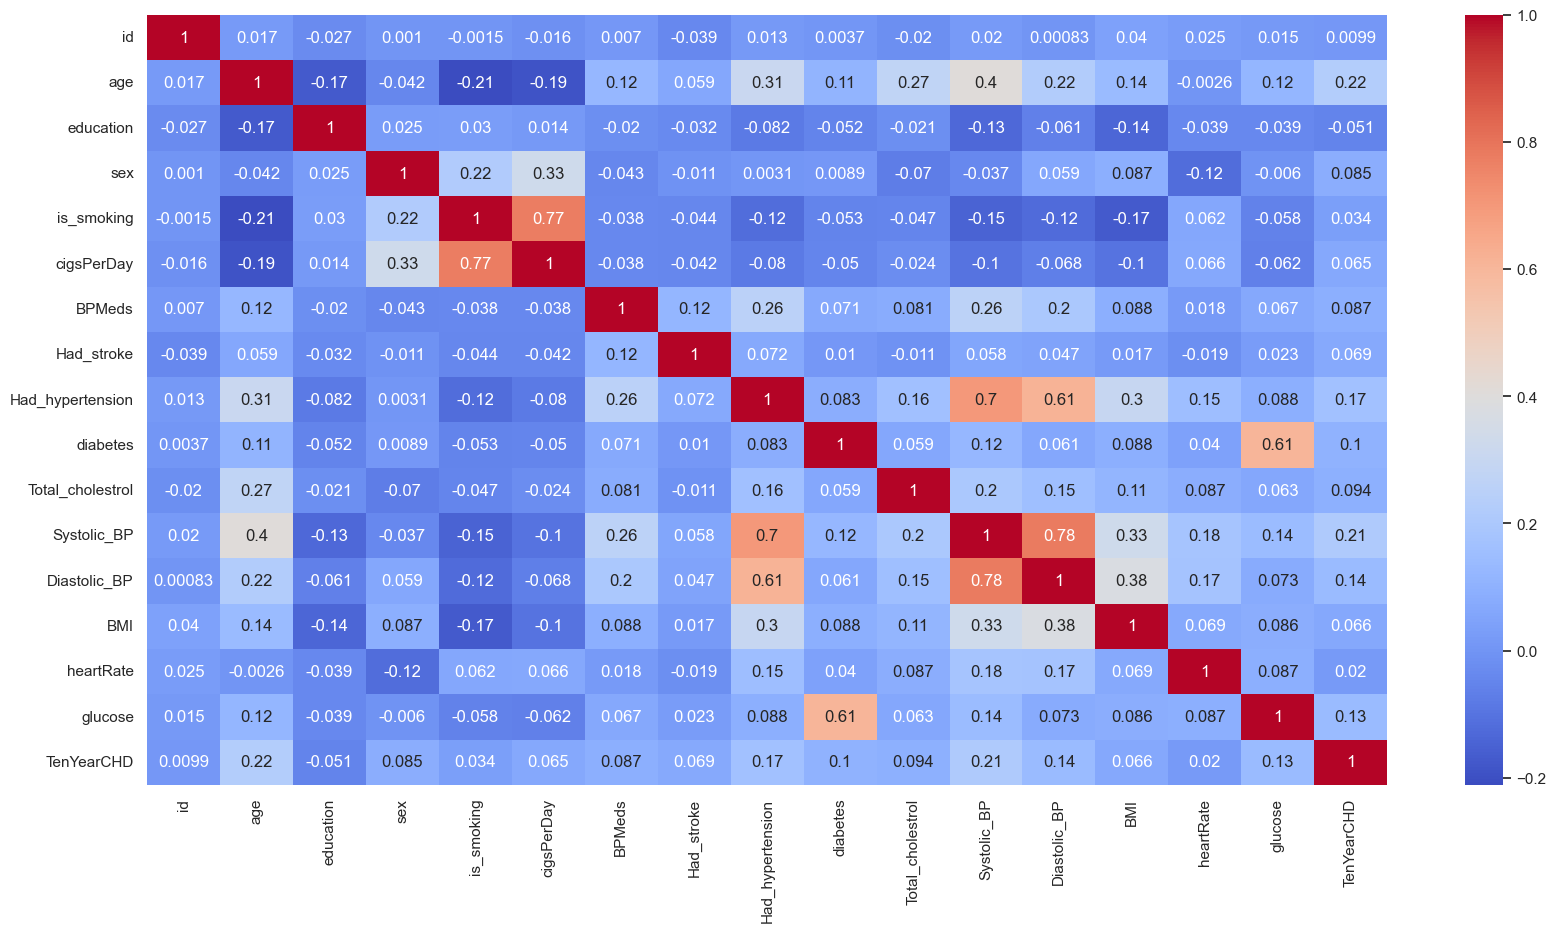

In [53]:
# Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

High Correlation between Independent Variable:
    
1. is_smoking and cigsPerDay
2. Systolic_BP and Diastolic_BP
3. Had_hypertension and Systolic_BP, Diastolic_BP

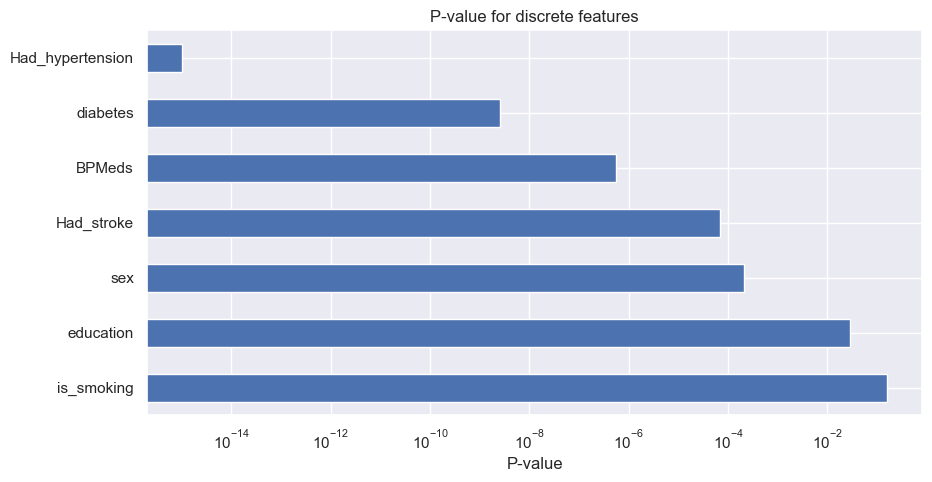

In [54]:
# Plotting p-value for chi2 test for discrete features

plt.figure(figsize=(10,5))
p_values_dis.plot.barh()
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
plt.show()

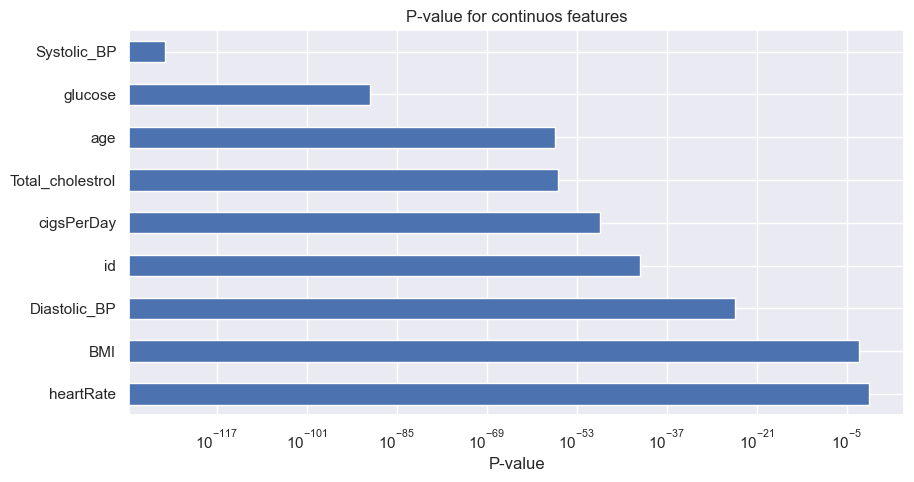

In [55]:
# Plotting p-value for chi2 test for continuous features

plt.figure(figsize=(10,5))
p_values_con.plot.barh()
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for continuos features')
plt.show()

From the above we can change:

1. We can drop is_smoking column and only keep cigsPerDay
2. We can create a new feature including both systolic and diastolic BP

In [56]:
# Dropping is_smoking column
df.drop('is_smoking',axis=1,inplace=True)

To handle multicollinearity between two independent continous variables, we can replace these two columns with a new variable 'Pulse pressure', which is given as follows:

Pulse Pressure = Systolic BP - Diastolic BP

[Reference Link](https://my.clevelandclinic.org/health/body/21629-pulse-pressure)

In [57]:
# Creating a new feature called pulse pressure to remove collinearity
df['pulse_pressure'] = df['Systolic_BP'] - df['Diastolic_BP']

In [58]:
df.drop(['id','Systolic_BP','Diastolic_BP'],axis=1,inplace=True)
df.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'Had_stroke',
       'Had_hypertension', 'diabetes', 'Total_cholestrol', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD', 'pulse_pressure'],
      dtype='object')

### Data Transformation

Reducing skewness

In [59]:
continuos_var.remove('id')
continuos_var.remove('Systolic_BP')
continuos_var.remove('Diastolic_BP')
continuos_var.append('pulse_pressure')

In [60]:
continuos_var

['age',
 'cigsPerDay',
 'Total_cholestrol',
 'BMI',
 'heartRate',
 'glucose',
 'pulse_pressure']

In [61]:
# Checking skewness on continuous variables

(df[continuos_var]).skew(axis=0)

age                 0.225796
cigsPerDay          1.204077
Total_cholestrol    0.948170
BMI                 1.025551
heartRate           0.676660
glucose             6.342892
pulse_pressure      1.412382
dtype: float64

In [62]:
# Performing Log transform on all the continous columns to reduce skewness


df['age']                 = np.log1p(df['age'])
df['cigsPerDay']          = np.log1p(df['cigsPerDay'])
df['Total_cholestrol']    = np.log1p(df['Total_cholestrol'])
df['BMI']                 = np.log1p(df['BMI'])
df['heartRate']           = np.log1p(df['heartRate'])
df['glucose']             = np.log1p(df['glucose'])
df['pulse_pressure']      = np.log1p(df['pulse_pressure'])


In [63]:
# Checking skewness afrer log transformation

(df[continuos_var]).skew(axis=0)

age                -0.015053
cigsPerDay          0.275072
Total_cholestrol    0.011860
BMI                 0.370422
heartRate           0.165898
glucose             2.309072
pulse_pressure      0.354174
dtype: float64

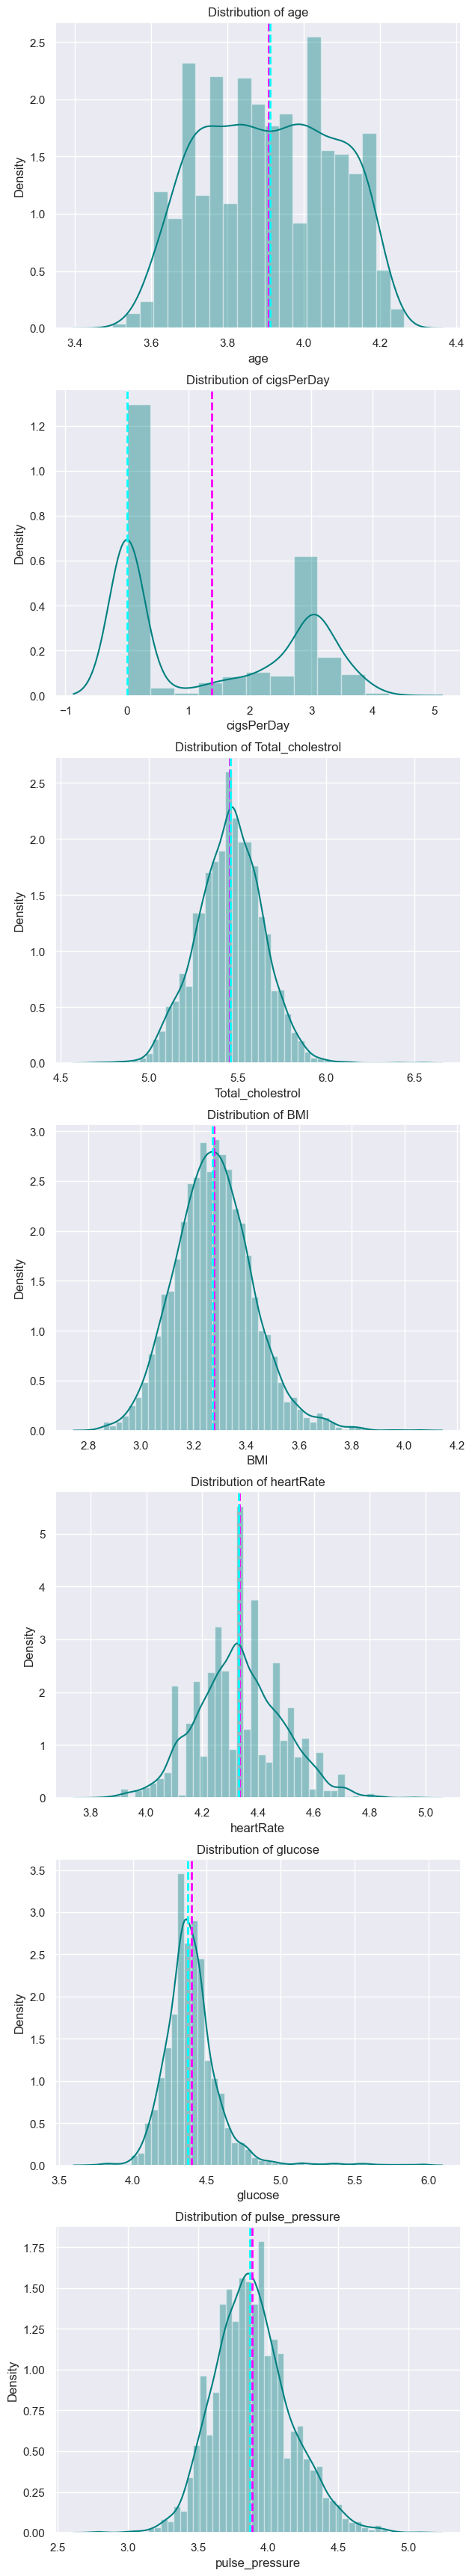

In [64]:
# Recheking Distibution of Continuos Variables after log transformation
plt.figure(figsize=(7,50))

for i, col in enumerate(continuos_var):
    plt.subplot(8,1,i+1)
    sns.distplot(df[col],color='teal')
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title('Distribution of '+col)

plt.show()

Skewness has reduced significantly in the continuous feature after performing log transformation

### Handling Outliers

Althrough after reducing skewness, the number of outlier should already decrease, but if still there are outliers in the columns outside of 3 standard deviations, we will impute them with median values.

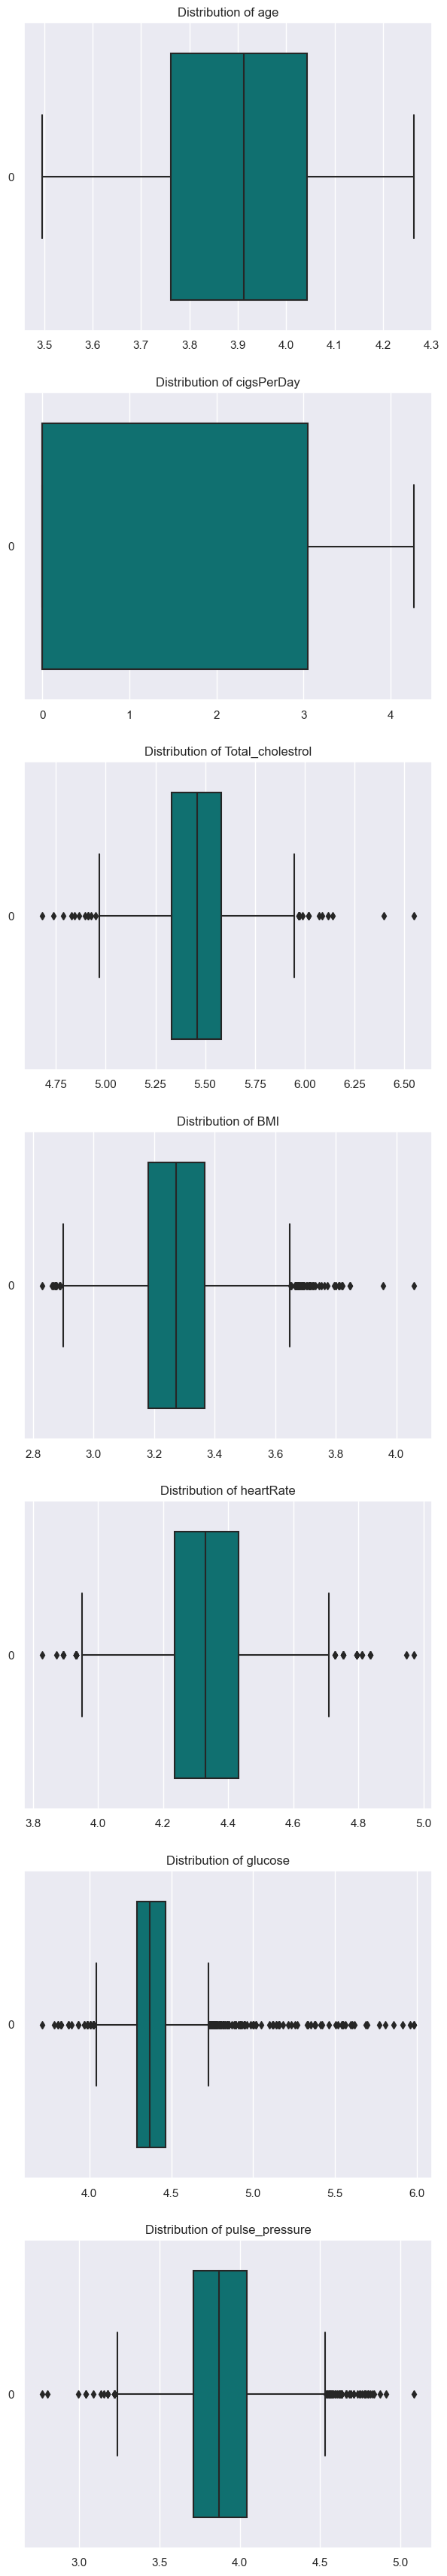

In [65]:
# Cheking Outliers of Continuos Variables
plt.figure(figsize=(7,50))

for i, col in enumerate(continuos_var):
    plt.subplot(8,1,i+1)
    sns.boxplot(df[col],color='teal',orient='h')
    plt.title('Distribution of '+col)

plt.show()

Outliers are still present in the following columns:

1. Total cholestrol
2. BMI
3. Heart Rate 
4. Glucose
5. Pulse Pressure

We will impute these outlier values with median

In [66]:
# Imputing the outliers beyond 3 standard deviations from its median value

for i in ['Total_cholestrol', 'BMI', 'heartRate', 'glucose','pulse_pressure']:
    upper_lim = df[i].mean() + 3*df[i].std()
    lower_lim = df[i].mean() - 3*df[i].std()
    df.loc[(df[i] > upper_lim),i] = df[i].median()
    df.loc[(df[i] < lower_lim),i] = df[i].median()
    

Outlier values are thus removed from the above columns

###  Categorical Encoding

Label encoding has already been done in code earlier on the following columns:
- sex and is_smoking

### Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [67]:
df['TenYearCHD'].value_counts()

0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64

The target variable TenYearCHD is imbalanced. As true values are less, to handle imbalance we will need to perform oversampling.

In [68]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

### Using SMOTE

In [74]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install --upgrade imbalanced-learn



                                              0.0/235.6 kB ? eta -:--:--
     -----------------------                143.4/235.6 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0


In [81]:
# Using SMOTE for handling class imbalance in target variable
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

In [82]:
y_smote.value_counts()

1.0    2879
0.0    2879
Name: TenYearCHD, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

### Data Splitting

In [83]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

In [84]:
X_train.shape

(4606, 13)

In [85]:
X_test.shape

(1152, 13)

### Data Scaling

In [86]:
# Normalizing the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_smote = scaler.fit_transform(X_smote)
X_test = scaler.transform(X_test)

In [87]:
X_train

array([[0.85903291, 1.        , 0.        , ..., 0.46258189, 0.44528099,
        0.56686569],
       [0.52377067, 0.33333333, 1.        , ..., 0.50931582, 0.45638779,
        0.51301491],
       [0.35015935, 0.        , 1.        , ..., 0.43034641, 0.47871251,
        0.37357681],
       ...,
       [0.81642458, 0.        , 1.        , ..., 0.14351807, 0.51006678,
        0.61966255],
       [0.52377067, 0.66666667, 1.        , ..., 0.60221341, 0.52794662,
        0.76291821],
       [0.35015935, 0.66666667, 0.        , ..., 0.32789144, 0.55031058,
        0.38900675]])

## ML Model Implementation

In [88]:
# Importing Librares

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn.metrics import classification_report, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [89]:
# Defining a function for getting recall value

def get_recall(actual,predicated):
    return recall_score(y_true=actual,y_pred=predicated,average='binary')

## ML Model - Logistic Regression

In [90]:
logistic = LogisticRegression()

# Fit the Algorithm
logistic.fit(X_train,y_train)

# Predict on the model
y_train_pred = logistic.predict(X_train)

y_test_pred = logistic.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric

In [93]:
# Training Recall Score

lr_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall :{lr_train_recall}')

Train Recall :0.6778929188255614


In [94]:
# Test Recall Score

lr_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall :{lr_test_recall}')

Test Recall :0.7033747779751333


In [95]:
# Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66       589
         1.0       0.65      0.70      0.68       563

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



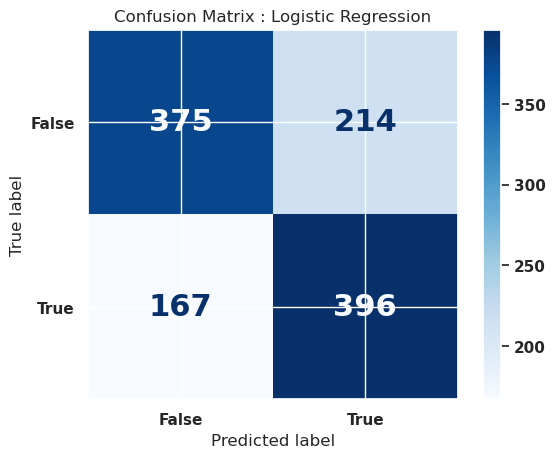

In [96]:
# Confusion Matrix

lr_confusion_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = cmd(lr_confusion_matrix,display_labels=['False','True'])
font = {'family':'DejaVu Sans',
       'weight':'bold',
       'size':22}
plt.rc('font',**font)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix : Logistic Regression')
plt.show()

### ML Model - Support Vector Machine

In [97]:
svm = SVC()

# Fit the Algorithm
svm.fit(X_train,y_train)

# Predict on the model
y_train_pred = svm.predict(X_train)

y_test_pred = svm.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric

In [98]:
# Training Recall Score

svm_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall :{svm_train_recall}')

Train Recall :0.7292746113989638


In [99]:
# Test Recall Score

svm_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall :{svm_test_recall}')

Test Recall :0.6980461811722913


#### 2. Cross- Validation & Hyperparameter Tuning

In [101]:
# Implementation with hyperparameter optimization techniques

svm_params = {'C':[0.1,1,10],
             'gamma':[0.01,0.001,0.0001],
             'kernel':['rbf']
             }

# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm,
                             svm_params,
                             cv=3,
                             scoring='recall')

svm_gridsearch.fit(X_smote,y_smote)

print(svm_gridsearch.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [112]:
svm_gridsearch.best_estimator_

SVC(C=10, gamma=0.01)

In [102]:
# Fitting and predicting data using best estimator

svm_grid = svm_gridsearch.best_estimator_

y_train_pred = svm_grid.predict(X_train)

y_test_pred = svm_grid.predict(X_test)

In [103]:
# Training Recall Score
svm_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall : {svm_train_recall}')

Train Recall : 0.6817789291882557


In [104]:
# Testing Recall Score
svm_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall : {svm_test_recall}')

Test Recall : 0.7104795737122558


In [105]:
# Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67       589
         1.0       0.65      0.71      0.68       563

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152



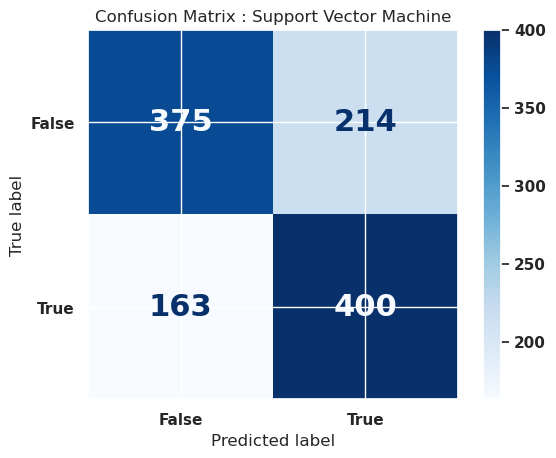

In [106]:
# Confusion Matrix

svm_confusion_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = cmd(svm_confusion_matrix,display_labels=['False','True'])
font = {'family':'DejaVu Sans',
       'weight':'bold',
       'size':22}
plt.rc('font',**font)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix : Support Vector Machine')
plt.show()

### ML Model - Decision Tree

In [107]:
# Implementation
dt_clf = DecisionTreeClassifier()

# Fit Algorithm
dt_clf.fit(X_train,y_train)

# Predict on the model
y_train_pred = dt_clf.predict(X_train)

y_test_pred = dt_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric

In [108]:
# Training Recall Score

dt_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall :{dt_train_recall}')

Train Recall :1.0


In [109]:
# Test Recall Score

dt_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall :{dt_test_recall}')

Test Recall :0.783303730017762


#### 2. Cross- Validation & Hyperparameter Tuning

In [110]:
# Implementation with hyperparameter optimization techniques

dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

# Using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_clf,
                             dt_params,
                             cv=3,
                             scoring='recall')

dt_gridsearch.fit(X_smote,y_smote)

print(dt_gridsearch.best_params_)

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


In [111]:
dt_gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [113]:
# Fitting and predicting data using best estimator

dt_grid = dt_gridsearch.best_estimator_

y_train_pred = dt_grid.predict(X_train)

y_test_pred = dt_grid.predict(X_test)

In [114]:
# Training Recall Score
dt_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall : {dt_train_recall}')

Train Recall : 0.7992227979274611


In [115]:
# Testing Recall Score
dt_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall : {dt_test_recall}')

Test Recall : 0.8312611012433393


In [116]:
# Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.44      0.55       589
         1.0       0.59      0.83      0.69       563

    accuracy                           0.63      1152
   macro avg       0.66      0.64      0.62      1152
weighted avg       0.66      0.63      0.62      1152



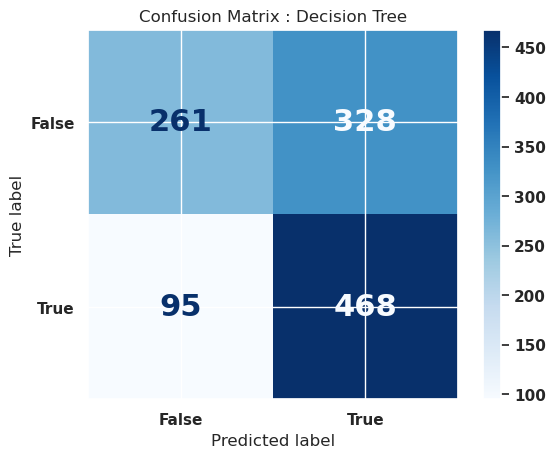

In [117]:
# Confusion Matrix

dt_confusion_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = cmd(dt_confusion_matrix,display_labels=['False','True'])
font = {'family':'DejaVu Sans',
       'weight':'bold',
       'size':22}
plt.rc('font',**font)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix : Decision Tree')
plt.show()

### ML Model - Random Forest

In [118]:
# Implementation
rf_clf = RandomForestClassifier()

# Fit Algorithm
rf_clf.fit(X_train,y_train)

# Predict on the model
y_train_pred = rf_clf.predict(X_train)

y_test_pred = rf_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric

In [119]:
# Training Recall Score

rf_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall :{rf_train_recall}')

Train Recall :1.0


In [120]:
# Test Recall Score

rf_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall :{rf_test_recall}')

Test Recall :0.8987566607460036


#### 2. Cross- Validation & Hyperparameter Tuning

In [122]:
# Implementation with hyperparameter optimization techniques

rf_params = {'n_estimators':[400,600,800,1000,None],
             'max_depth': [40,60,80,100,None]
             }

# Using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_clf,
                             rf_params,
                             cv=3,
                             scoring='recall')

rf_gridsearch.fit(X_smote,y_smote)

print(rf_gridsearch.best_params_)

{'max_depth': 80, 'n_estimators': 400}


In [123]:
rf_gridsearch.best_estimator_

RandomForestClassifier(max_depth=80, n_estimators=400)

In [124]:
# Fitting and predicting data using best estimator

rf_grid = rf_gridsearch.best_estimator_

y_train_pred = rf_grid.predict(X_train)

y_test_pred = rf_grid.predict(X_test)

In [125]:
# Training Recall Score
rf_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall : {rf_train_recall}')

Train Recall : 0.9965457685664939


In [126]:
# Testing Recall Score
rf_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall : {rf_test_recall}')

Test Recall : 1.0


In [127]:
# Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       589
         1.0       1.00      1.00      1.00       563

    accuracy                           1.00      1152
   macro avg       1.00      1.00      1.00      1152
weighted avg       1.00      1.00      1.00      1152



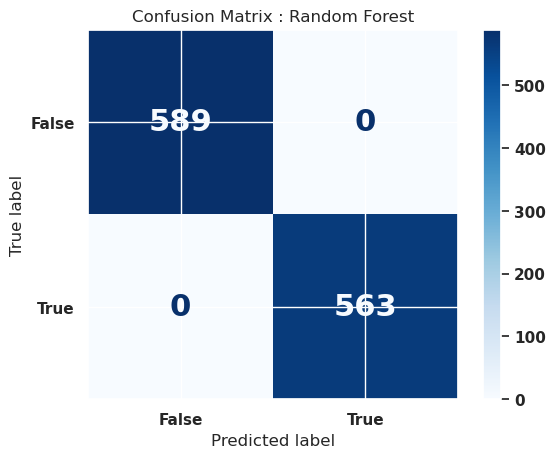

In [128]:
# Confusion Matrix

rf_confusion_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = cmd(rf_confusion_matrix,display_labels=['False','True'])
font = {'family':'DejaVu Sans',
       'weight':'bold',
       'size':22}
plt.rc('font',**font)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix : Random Forest')
plt.show()

### ML Model - XGBoost

In [129]:
# Implementation
xgb = xgb.XGBClassifier()

# Fit Algorithm
xgb.fit(X_train,y_train)

# Predict on the model
y_train_pred = xgb.predict(X_train)

y_test_pred = xgb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric

In [130]:
# Training Recall Score

xgb_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall :{xgb_train_recall}')

Train Recall :0.9883419689119171


In [131]:
# Test Recall Score

xgb_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall :{xgb_test_recall}')

Test Recall :0.9378330373001776


#### 2. Cross- Validation & Hyperparameter Tuning

In [132]:
# Implementation with hyperparameter optimization techniques

xgb_params = {'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

# Using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb,
                             xgb_params,
                             cv=3,
                             scoring='recall')

xgb_gridsearch.fit(X_smote,y_smote)

print(xgb_gridsearch.best_params_)

{'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


In [133]:
xgb_gridsearch.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_leaf=0.1,
              min_samples_split=0.1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [134]:
# Fitting and predicting data using best estimator

xgb_grid = xgb_gridsearch.best_estimator_

y_train_pred = xgb_grid.predict(X_train)

y_test_pred = xgb_grid.predict(X_test)

In [135]:
# Training Recall Score
xgb_train_recall = get_recall(y_train,y_train_pred)
print(f'Train Recall : {xgb_train_recall}')

Train Recall : 0.9766839378238342


In [136]:
# Testing Recall Score
xgb_test_recall = get_recall(y_test,y_test_pred)
print(f'Test Recall : {xgb_test_recall}')

Test Recall : 0.9769094138543517


In [137]:
# Classification Report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       589
         1.0       1.00      0.98      0.99       563

    accuracy                           0.99      1152
   macro avg       0.99      0.99      0.99      1152
weighted avg       0.99      0.99      0.99      1152



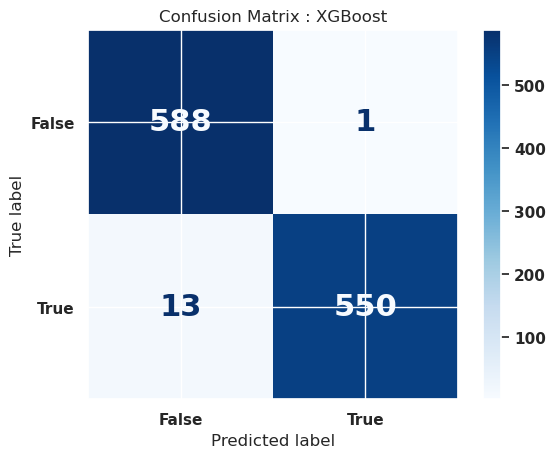

In [138]:
# Confusion Matrix

xgb_confusion_matrix = confusion_matrix(y_test,y_test_pred)
cm_display = cmd(xgb_confusion_matrix,display_labels=['False','True'])
font = {'family':'DejaVu Sans',
       'weight':'bold',
       'size':22}
plt.rc('font',**font)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix : XGBoost')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since, the data was imbalanced, accuracy would not be the best evaluation metric to use.

Here, we are dealing with health data, where Type 2 error/ False Negatives are of high concern to us. Actual positives should not go undetected.

Hence, recall is the best evaluation metric to use in such case.

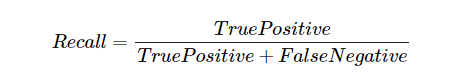

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Testing recall performance of all models

In [139]:
models = ['Logistic Regression','Support Vector Machine','Decision Tree','Random Forest','XGBoost']
train_recall = [lr_train_recall,svm_train_recall,dt_train_recall,rf_train_recall,xgb_train_recall]
test_recall = [lr_test_recall,svm_test_recall,dt_test_recall,rf_test_recall,xgb_test_recall]
recall_dict = {"Model":models,"Train Recall":train_recall,"Test Recall":test_recall}
recall_results = pd.DataFrame(recall_dict)

In [140]:
recall_results

,Model,Train Recall,Test Recall
0,Logistic Regression,0.677893,0.703375
1,Support Vector Machine,0.681779,0.710480
2,Decision Tree,0.799223,0.831261
3,Random Forest,0.996546,1.000000
4,XGBoost,0.976684,0.976909


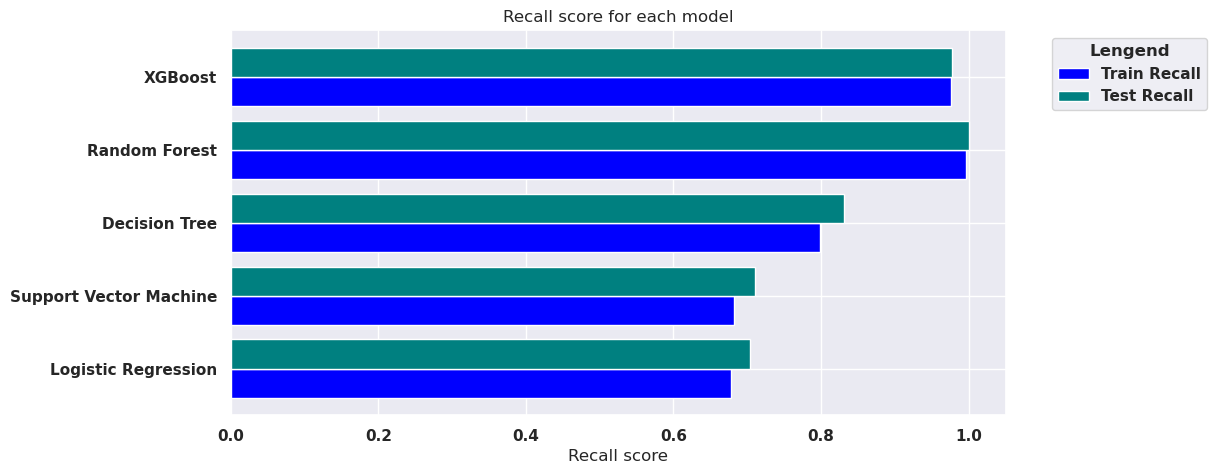

In [141]:
X_axis = np.arange(len(models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recall,0.4,label='Train Recall',color='Blue')
plt.barh(X_axis + 0.2, test_recall,0.4,label='Test Recall',color='teal')

plt.yticks(X_axis,models)
plt.xlabel('Recall score')
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',title='Lengend')
plt.show()

From the above graph we can see, hyperparameter tuned Random Forest is giving the best recall value for test data which is 1. But, xgboost model gives us a more realistic recall of 0.98

Hence we will use xgboost gridsearchcv model as our final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [142]:
#Extracting most important features from final prediction model
importances = xgb_grid.feature_importances_

In [143]:
indenpendent_var = df.columns.tolist()
indenpendent_var.remove('TenYearCHD')
print(indenpendent_var)

['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'Had_stroke', 'Had_hypertension', 'diabetes', 'Total_cholestrol', 'BMI', 'heartRate', 'glucose', 'pulse_pressure']


In [145]:
# Creating a dictionary with all the important features

importance_dict = {'Feature':indenpendent_var,'Feature Importance':importances}

# Creating a dataframe from the dictionary of important features
importance_df = pd.DataFrame(importance_dict)

# Sorting features inside df by feature importance in descending order
important_features = importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [148]:
# Creating a printing the list of important features
imp_features = importance_features['Feature'].tolist()
print(f"Important Features are : {imp_features}")

Important Features are :['age', 'diabetes', 'heartRate', 'sex', 'Had_hypertension', 'cigsPerDay', 'BPMeds', 'pulse_pressure', 'education', 'glucose', 'Total_cholestrol', 'Had_stroke', 'BMI']


Text(0.5, 1.0, 'Feature Importance')

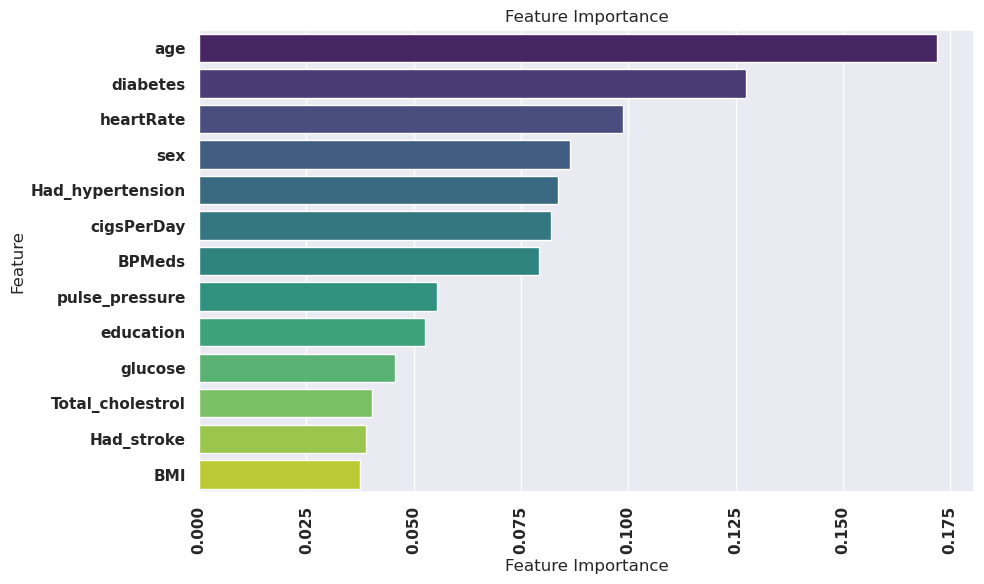

In [155]:
# plotting the important features obtained from the optimal XGB model
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Feature Importance',y='Feature',data=important_features,palette='viridis')
plt.xticks(rotation=90)
plt.title('Feature Importance')


# **Conclusion**

 - In this project we built 5 Classifcation ML Models to predict risk of coronary heart disease amongst patients.
 - To build these models:
     - Missing values were handled by imputing mode values for categorical column and median/KNN Imputer values for continuous columns.
     - Feature engineering and feature selection was performed that included handling multicollinearity, reducing skewness, handling outliers and class imbalance in data was handled using SMOTE.

- Recall was chosen as the best evaluation metric as we are working with medical data, where false negatives are of high concern. When we fail to detect people at risk of getting a disease, that can lead to loss in life and is thus highly dangerous.

- Initially simple models like Logistic Regression and SVM were used and later on more complex tree based and ensemble models were used.

- Final model chosen was hyperparamter tuned xgboost model, which gave a recall of 0.98 on test data. This means that out of 100 possible high risk patients, we were able to classify all 98 succesfully. This high accuracy is beneficial in saving lives in critical conditions.

- Age came out to be the most important feature in our model followed by diabetes and heart rate. On the other hand, BMI and total_cholestrol were the least import features.
